In [9]:
# 28 Sep 2019
# Logistic Regression

import pandas as pd         # pd is alias name, execute (ctrl+enter) once to load to notebook

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression     

diabetes_df = pd.read_csv('diabetes.csv')

#diabetes_df[['BloodPressure', 'Glucose','Age']]

y = diabetes_df['Outcome']

diabetes_df.drop(columns='Outcome',inplace=True)  #dropping output variable from the dataset. Seting the inplace parameter to True so that drop happens immediately

# Splitting the data in to 80 : 20 ratio for traning and test purpose, "random" is used to freeze the data

X_train,X_test,y_train,y_test=train_test_split(diabetes_df,y,test_size=0.20,random_state=31)  # to not change the random model 

#X_train



In [2]:
#Instantiating the model, Log_reg is the object

log_reg = LogisticRegression()

# Training the model on the train data

log_reg.fit(X_train,y_train)

# Predict on the test data

y_pred=log_reg.predict(X_test)

y_pred

comparisons_df=pd.DataFrame({'Actuals':y_test,'Predictions':y_pred})

#comparisons_df


C:\Users\KESHAV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [3]:
#29Sep2019

#Import the metrics to measure he performance of the model, here the problem statement is classification,  so we import the classification
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve

#Generate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[83, 15],
       [26, 30]], dtype=int64)

In [5]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))


Accuracy 0.7337662337662337
Precision 0.6666666666666666
Recall 0.5357142857142857


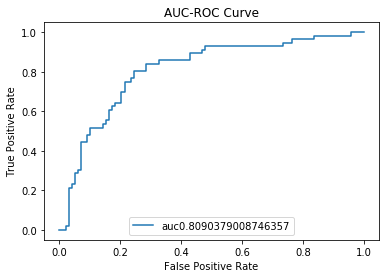

In [12]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]

# the function roc_curve returns 3 values-
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)   

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc"+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=8)
plt.show()


In [15]:
print(fpr,tpr,thresholds)

# Both FPR and TPR are increasing as the Thresholds are increasing

[0.         0.01020408 0.02040816 0.02040816 0.03061224 0.03061224
 0.04081633 0.04081633 0.05102041 0.05102041 0.06122449 0.06122449
 0.07142857 0.07142857 0.09183673 0.09183673 0.10204082 0.10204082
 0.14285714 0.14285714 0.15306122 0.15306122 0.16326531 0.16326531
 0.17346939 0.17346939 0.18367347 0.18367347 0.20408163 0.20408163
 0.21428571 0.21428571 0.23469388 0.23469388 0.24489796 0.24489796
 0.28571429 0.28571429 0.32653061 0.32653061 0.42857143 0.42857143
 0.46938776 0.46938776 0.47959184 0.47959184 0.73469388 0.73469388
 0.76530612 0.76530612 0.83673469 0.83673469 0.95918367 0.95918367
 1.        ] [0.         0.         0.         0.01785714 0.01785714 0.21428571
 0.21428571 0.23214286 0.23214286 0.28571429 0.28571429 0.30357143
 0.30357143 0.44642857 0.44642857 0.48214286 0.48214286 0.51785714
 0.51785714 0.53571429 0.53571429 0.55357143 0.55357143 0.60714286
 0.60714286 0.625      0.625      0.64285714 0.64285714 0.69642857
 0.69642857 0.75       0.75       0.76785714 0.76

In [14]:
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba

array([[0.94481479, 0.05518521],
       [0.78213945, 0.21786055],
       [0.83270303, 0.16729697],
       [0.8295058 , 0.1704942 ],
       [0.32305927, 0.67694073],
       [0.60292068, 0.39707932],
       [0.93941772, 0.06058228],
       [0.5987232 , 0.4012768 ],
       [0.74256014, 0.25743986],
       [0.89887256, 0.10112744],
       [0.76827013, 0.23172987],
       [0.13938212, 0.86061788],
       [0.71085707, 0.28914293],
       [0.82970636, 0.17029364],
       [0.66395895, 0.33604105],
       [0.65980475, 0.34019525],
       [0.87656523, 0.12343477],
       [0.9927351 , 0.0072649 ],
       [0.37298553, 0.62701447],
       [0.87801791, 0.12198209],
       [0.59846313, 0.40153687],
       [0.39200589, 0.60799411],
       [0.24034506, 0.75965494],
       [0.92077847, 0.07922153],
       [0.85424637, 0.14575363],
       [0.69491142, 0.30508858],
       [0.38073661, 0.61926339],
       [0.12190239, 0.87809761],
       [0.50010163, 0.49989837],
       [0.25498119, 0.74501881],
       [0.